In [74]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



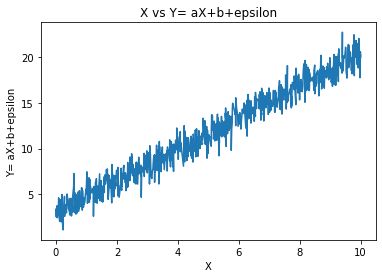

In [75]:

a= 10*np.random.rand()
b= 10*np.random.rand()
epsilon = np.random.normal(0,1,1000)
x = np.random.uniform(0,10,1000)

y =  a*x + b + epsilon
# line from seaborn
sns.lineplot(x,y)
plt.title('X vs Y= aX+b+epsilon')
plt.xlabel('X')
plt.ylabel('Y= aX+b+epsilon')
plt.show()

In [76]:


class LinearRegression:
    def Hypothesis(self,x,W):
        '''
        Function to calculate the Hypothesis ie h(x) = W0 + W1*x1 + W2*x2 + ... + Wn*xn
        x: input data
        W: parameters
        return: Hypothesis
        '''
        return np.dot(x,W.T)

    def Cost(self,x,y,W):
        '''
        Function to calculate the cost function
        x: input data
        y: output data
        W: parameters
        return: cost function
        '''
        m = len(x) # number of training examples
        J = (1/(2*m))*np.sum((self.Hypothesis(x,W)-y)**2)
        return J
        
    ## Define gradient descent for linear regression
    def GradientDescent(self,x, y, W, learn_rate, epochs):
        '''
        Function to calculate the gradient descent
        x: input data
        y: output data
        W: parameters
        learn_rate: learning rate
        epochs: number of iterations
        return: parameters
        '''
        m = len(x)
        J_values=[]
        epochs_values=[]
        for i in range(epochs):
            W = W - (learn_rate/m)*(x.T)@(self.Hypothesis(x,W)-y)
            J_values.append(self.Cost(x,y,W))
            epochs_values.append(i)
        plt.plot(epochs_values,J_values)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        return W


class Ridge_Regularization:
    def Hypothesis(self,x,W):
        '''
        Function to calculate the Hypothesis ie h(x) = W0 + W1*x1 + W2*x2 + ... + Wn*xn
        x: input data
        W: parameters
        return: Hypothesis
        '''
        return np.dot(x,W.T)

    def Cost(self,x,y,W,lamda):
        '''
        Function to calculate the cost function
        x: input data
        y: output data
        W: parameters
        lamda: regularization parameter
        return: cost function
        '''
        m = len(x)
        J = (1/(2*m))*np.sum((self.Hypothesis(x,W)-y)**2) + (lamda/(2*m))*np.sum(W**2)
        return J
    
    def GradientDescent(self,x, y, W, learn_rate, epochs,lamda):
        '''
        Function to calculate the gradient descent
        x: input data
        y: output data
        W: parameters
        learn_rate: learning rate
        epochs: number of iterations
        lamda: regularization parameter
        return: parameters
        '''
        m = len(x)
        J_values=[]
        epochs_values=[]
        for i in range(epochs):
            z= (x.T)@(self.Hypothesis(x,W)-y) + lamda*W
            z= z.T
            W = W - (learn_rate/m)*z
            W[0]=W[0]+lamda*W[0]*(learn_rate)/m
            J_values.append(self.Cost(x,y,W,lamda))
            epochs_values.append(i)
        plt.plot(epochs_values,J_values)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        return W
class Lasso_Regularization:
    def Hypothesis(self,x,W):
        '''
        Function to calculate the Hypothesis ie h(x) = W0 + W1*x1 + W2*x2 + ... + Wn*xn
        x: input data
        W: parameters
        return: Hypothesis
        '''
        return np.dot(x,W.T)

    def Cost(self,x,y,W,lamda):
        '''
        Function to calculate the cost function
        x: input data
        y: output data
        W: parameters
        lamda: regularization parameter
        return: cost function
        '''
        m = len(x)
        J = (1/(2*m))*np.sum((self.Hypothesis(x,W)-y)**2) + (lamda/(2*m))*np.sum(np.abs(W))
        return J
    
    def GradientDescent(self,x, y, W, learn_rate, epochs,lamda):
        '''
        Function to calculate the gradient descent
        x: input data
        y: output data
        W: parameters
        learn_rate: learning rate
        epochs: number of iterations
        lamda: regularization parameter
        return: parameters
        '''
        m = len(x)
        J_values=[]
        epochs_values=[]
        for i in range(epochs):
            z= (x.T)@(self.Hypothesis(x,W)-y) + lamda*np.sign(W)
            z= z.T
            W = W - (learn_rate/m)*z
            W[0]=W[0]+lamda*np.sign(W[0])*(learn_rate)/m
            J_values.append(self.Cost(x,y,W,lamda))
            epochs_values.append(i)
        plt.plot(epochs_values,J_values)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        return W
    
class Elastic_Regularization:
    def Hypothesis(self,x,W):
        '''
        Function to calculate the Hypothesis ie h(x) = W0 + W1*x1 + W2*x2 + ... + Wn*xn
        x: input data
        W: parameters
        return: Hypothesis
        '''
        return np.dot(x,W.T)
    
    def Cost(self,x,y,W,lamda):
        '''
        Function to calculate the cost function
        x: input data
        y: output data
        W: parameters
        lamda: regularization parameter
        return: cost function
        '''
        m = len(x)
        J = (1/(2*m))*np.sum((self.Hypothesis(x,W)-y)**2) + (lamda/(2*m))*np.sum(np.abs(W)) + ((lamda/(2*m))*np.sum(W**2))
        return J
    
    def GradientDescent(self,x, y, W, learn_rate, epochs,lamda):
        '''
        Function to calculate the gradient descent
        x: input data
        y: output data
        W: parameters
        learn_rate: learning rate
        epochs: number of iterations
        lamda: regularization parameter
        return: parameters
        '''
        m = len(x)
        J_values=[]
        epochs_values=[]
        for i in range(epochs):
            z= (x.T)@(self.Hypothesis(x,W)-y) + lamda*np.sign(W) + lamda*W
            z= z.T
            W = W - (learn_rate/m)*z
            W[0]=W[0]+lamda*np.sign(W[0])*(learn_rate)/m + lamda*W[0]*(learn_rate)/m
            J_values.append(self.Cost(x,y,W,lamda))
            epochs_values.append(i)
        plt.plot(epochs_values,J_values)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        return W
    
## Creating dataset
def GenerateData(degree,x): 
    '''
    Function to create the dataset
    degree: degree of the polynomial
    x: input data
    return: dataset
    '''
    return [x**i for i in range(degree+1)]


In [77]:

LR = LinearRegression()
RR= Ridge_Regularization()
LRR= Lasso_Regularization()
ELR= Elastic_Regularization()



In [78]:

# First, we generate data using the function GenerateData
degree=10
X_data = GenerateData(degree,x)
X_data = np.array(X_data).T
Y_data = y
# Generate random parameters for the function
theta = 10*abs((np.random.randn(degree+1)))
# Standardize the data
X_data = (X_data-np.mean(X_data))/np.std(X_data)
Y_data = (Y_data - np.mean(Y_data))/np.std(Y_data)
# Split data into training and testing
X_data, X_test, Y_data, Y_test = train_test_split(X_data, Y_data, test_size=0.2)



The value of cost function without regularization:  1.121593932917846


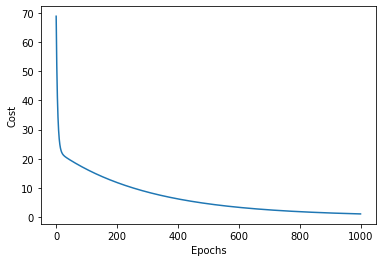

In [98]:
theta_new = LR.GradientDescent(X_data,Y_data,theta,0.01,1000)
total_loss = LR.Cost(X_data,Y_data,theta_new)
print("The value of cost function without regularization: ",total_loss)


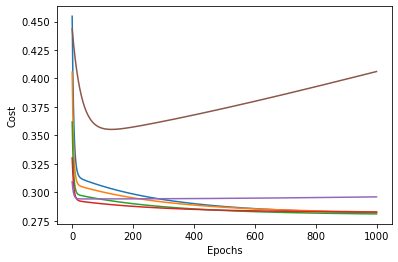

In [80]:

# RIDGE REGULARIZATION
k = 6
lamda_values = np.array([0.01,0.1,1,10,100,1000])
theta_values = np.zeros(degree+1)
total_cost=[]
theta_all= np.zeros([k,degree+1])
for i in range(k):
    lamda = lamda_values[i]
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=1/k)
    theta_new = RR.GradientDescent(train_x,train_y,theta_values,0.01,1000,lamda)
    theta_all[i]=theta_new
    theta_values = theta_values + theta_new/k
    total_cost.append(RR.Cost(test_x,test_y,theta_new,lamda))

In [81]:
total_cost = np.array(total_cost)
log_lamda = []
for i in range(k):
    log_lamda.append(np.log(lamda_values[i]))
log_lamda=np.array(log_lamda)


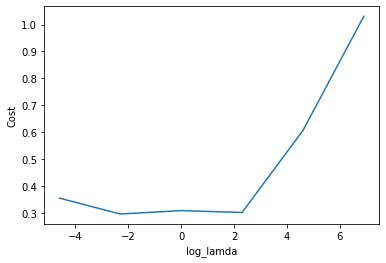

The best lamda for ridge regularization :  0.1


In [93]:
plt.plot(log_lamda,total_cost)
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=total_cost[0]
best_lamda=lamda_values[0]
for i in range(1,k):
    if total_cost[i]<min_loss:
        min_loss=total_cost[i]
        best_lamda=lamda_values[i]
print("The best lamda for ridge regularization : ", best_lamda)

The value of cost function after using ridge regulariation :  1.2140667389524136


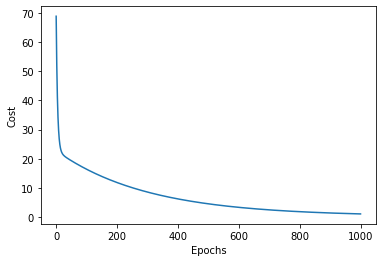

In [83]:
theta_best = RR.GradientDescent(X_data,Y_data,theta,0.01,1000, best_lamda)
print("The value of cost function after using ridge regulariation : ",RR.Cost(X_test,Y_test,theta_best,best_lamda))

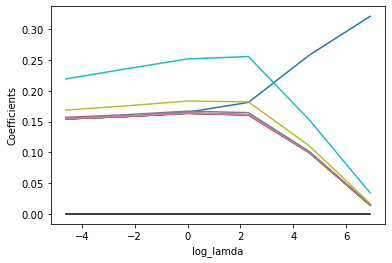

In [84]:
theta_all =theta_all.T
for i in range(10):
    plt.plot(log_lamda, np.array(theta_all[i]), linestyle='solid')
plt.plot(log_lamda,np.zeros(6),'black')
plt.xlabel("log_lamda")
plt.ylabel("Coefficients")
plt.show()

Lasso 

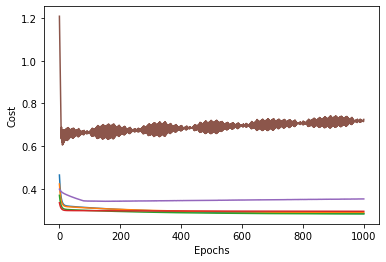

In [96]:
k = 6
lamda_values = np.array([0.01,0.1,1,10,100,1000])
theta_values = np.zeros(degree+1)
total_cost=[]
theta_all= np.zeros([k,degree+1])
for i in range(k):
    lamda = lamda_values[i]
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=1/k)
    theta_new = LRR.GradientDescent(train_x,train_y,theta_values,0.01,1000,lamda)
    theta_all[i]=theta_new
    theta_values = theta_values + theta_new/k
    total_cost.append(LR.Cost(test_x,test_y,theta_new))

total_cost = np.array(total_cost)
log_lamda = []
for i in range(k):
    log_lamda.append(np.log(lamda_values[i]))
log_lamda=np.array(log_lamda)


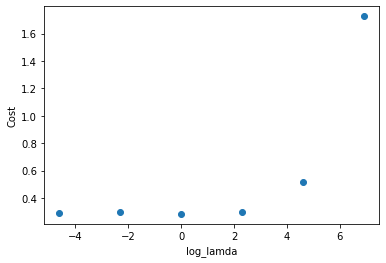

The best lamda for lasso regularization :  1.0


In [86]:
plt.plot(log_lamda,total_cost,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=total_cost[0]
best_lamda=lamda_values[0]
for i in range(1,k):
    if total_cost[i]<min_loss:
        min_loss=total_cost[i]
        best_lamda=lamda_values[i]
print("The best lamda for lasso regularization : ", best_lamda)

The value of cost function after using lasso regulariation :  1.2608825263744476


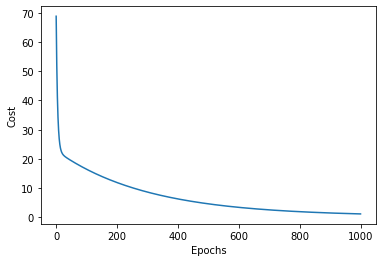

In [87]:
## Implementing the model after finding the best lamda
theta_best = LRR.GradientDescent(X_data,Y_data,theta,0.01,1000, best_lamda)
print("The value of cost function after using lasso regulariation : ",LRR.Cost(X_test,Y_test,theta_best,best_lamda))

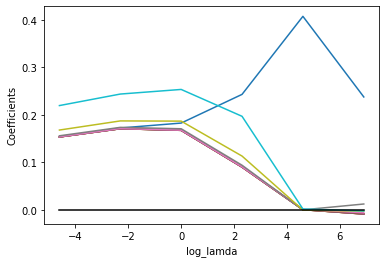

In [88]:
theta_all =theta_all.T
for i in range(10):
    plt.plot(log_lamda, np.array(theta_all[i]), linestyle='solid')
plt.plot(log_lamda,np.zeros(6),'black')
plt.xlabel("log_lamda")
plt.ylabel("Coefficients")
plt.show()

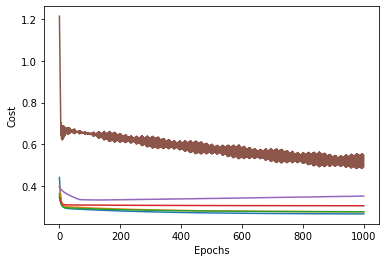

In [89]:
# ELASTIC REGULARIZATION
k = 6
lamda_values = np.array([0.01,0.1,1,10,100,1000])
theta_values = np.zeros(degree+1)
total_cost=[]
theta_all= np.zeros([k,degree+1])
for i in range(k):
    lamda = lamda_values[i]
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=1/k)
    theta_new = ELR.GradientDescent(train_x,train_y,theta_values,0.01,1000,lamda)
    theta_all[i]=theta_new
    theta_values = theta_values + theta_new/k
    total_cost.append(ELR.Cost(test_x,test_y,theta_new,lamda))

total_cost = np.array(total_cost)
log_lamda = []
for i in range(k):
    log_lamda.append(np.log(lamda_values[i]))
log_lamda=np.array(log_lamda)


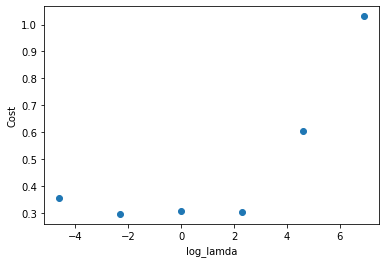

The best lamda for elastic regularization :  0.1


In [90]:
plt.plot(log_lamda,total_cost,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=total_cost[0]
best_lamda=lamda_values[0]
for i in range(1,k):
    if total_cost[i]<min_loss:
        min_loss=total_cost[i]
        best_lamda=lamda_values[i]
print("The best lamda for elastic regularization : ", best_lamda)

The value of cost function after using elastic regulariation :  1.2223206308183097


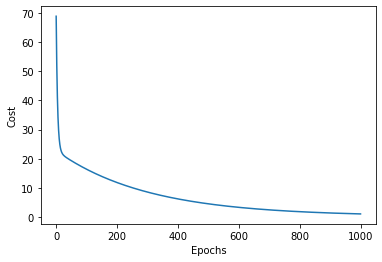

In [91]:
## Implementing the model after finding the best lamda
theta_best = ELR.GradientDescent(X_data,Y_data,theta,0.01,1000, best_lamda)
print("The value of cost function after using elastic regulariation : ",ELR.Cost(X_test,Y_test,theta_best,best_lamda))

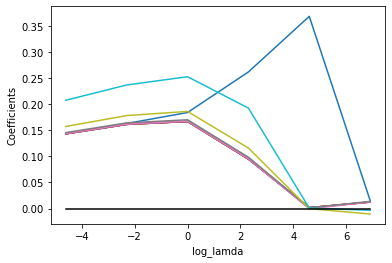

In [92]:
theta_all=theta_all.T
for i in range(10):
    plt.plot(log_lamda, np.array(theta_all[i]), linestyle='solid')
plt.plot(log_lamda,np.zeros(6),'black')
plt.xlabel("log_lamda")
plt.ylabel("Coefficients")
plt.show()
